# **DATA ANALYSIS**
* DATE: 30-05-2024
* created by: Aditi singh





#*Importing Libraries*
* we will start by importing the libraries

In [ ]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, norm, probplot, skew, kurtosis
from statsmodels.graphics.gofplots import qqplot
import plotly.express as px
import scipy.stats as stats


#*Load Dataset*
* A healthcare dataset is a collection of data related to various aspects of healthcare, including patient demographics, medical histories, diagnoses, treatments, and outcomes. These datasets can encompass a wide range of information such as electronic health records (EHRs), insurance claims, clinical trial data, and patient surveys. The primary purpose of healthcare datasets is to improve patient care, enhance clinical research, and inform health policy decisions. By analyzing these datasets, healthcare providers can identify trends, predict outcomes, personalize treatments, and ultimately improve the quality and efficiency of healthcare services. The data can also be used to track the spread of diseases, monitor public health, and develop new medical treatments and interventions.

In [ ]:
df=pl.read_csv("/content/healthcare_dataset.csv")
df

Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
str,i64,str,str,str,str,str,str,str,f64,i64,str,str,str,str
"""Bobby JacksOn""",30,"""Male""","""B-""","""Cancer""","""2024-01-31""","""Matthew Smith""","""Sons and Mille…","""Blue Cross""",18856.281306,328,"""Urgent""","""2024-02-02""","""Paracetamol""","""Normal"""
"""LesLie TErRy""",62,"""Male""","""A+""","""Obesity""","""2019-08-20""","""Samantha Davie…","""Kim Inc""","""Medicare""",33643.327287,265,"""Emergency""","""2019-08-26""","""Ibuprofen""","""Inconclusive"""
"""DaNnY sMitH""",76,"""Female""","""A-""","""Obesity""","""2022-09-22""","""Tiffany Mitche…","""Cook PLC""","""Aetna""",27955.096079,205,"""Emergency""","""2022-10-07""","""Aspirin""","""Normal"""
"""andrEw waTtS""",28,"""Female""","""O+""","""Diabetes""","""2020-11-18""","""Kevin Wells""","""Hernandez Roge…","""Medicare""",37909.78241,450,"""Elective""","""2020-12-18""","""Ibuprofen""","""Abnormal"""
"""adrIENNE bEll""",43,"""Female""","""AB+""","""Cancer""","""2022-09-19""","""Kathleen Hanna…","""White-White""","""Aetna""",14238.317814,458,"""Urgent""","""2022-10-09""","""Penicillin""","""Abnormal"""
"""EMILY JOHNSOn""",36,"""Male""","""A+""","""Asthma""","""2023-12-20""","""Taylor Newton""","""Nunez-Humphrey…","""UnitedHealthca…",48145.110951,389,"""Urgent""","""2023-12-24""","""Ibuprofen""","""Normal"""
"""edwArD EDWaRDs…",21,"""Female""","""AB-""","""Diabetes""","""2020-11-03""","""Kelly Olson""","""Group Middleto…","""Medicare""",19580.872345,389,"""Emergency""","""2020-11-15""","""Paracetamol""","""Inconclusive"""
"""CHrisTInA MARt…",20,"""Female""","""A+""","""Cancer""","""2021-12-28""","""Suzanne Thomas…","""Powell Robinso…","""Cigna""",45820.462722,277,"""Emergency""","""2022-01-07""","""Paracetamol""","""Inconclusive"""
"""JASmINe aGuIla…",82,"""Male""","""AB+""","""Asthma""","""2020-07-01""","""Daniel Ferguso…","""Sons Rich and""","""Cigna""",50119.222792,316,"""Elective""","""2020-07-14""","""Aspirin""","""Abnormal"""


In [ ]:
df.head()

Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
str,i64,str,str,str,str,str,str,str,f64,i64,str,str,str,str
"""Bobby JacksOn""",30,"""Male""","""B-""","""Cancer""","""2024-01-31""","""Matthew Smith""","""Sons and Mille…","""Blue Cross""",18856.281306,328,"""Urgent""","""2024-02-02""","""Paracetamol""","""Normal"""
"""LesLie TErRy""",62,"""Male""","""A+""","""Obesity""","""2019-08-20""","""Samantha Davie…","""Kim Inc""","""Medicare""",33643.327287,265,"""Emergency""","""2019-08-26""","""Ibuprofen""","""Inconclusive"""
"""DaNnY sMitH""",76,"""Female""","""A-""","""Obesity""","""2022-09-22""","""Tiffany Mitche…","""Cook PLC""","""Aetna""",27955.096079,205,"""Emergency""","""2022-10-07""","""Aspirin""","""Normal"""
"""andrEw waTtS""",28,"""Female""","""O+""","""Diabetes""","""2020-11-18""","""Kevin Wells""","""Hernandez Roge…","""Medicare""",37909.78241,450,"""Elective""","""2020-12-18""","""Ibuprofen""","""Abnormal"""
"""adrIENNE bEll""",43,"""Female""","""AB+""","""Cancer""","""2022-09-19""","""Kathleen Hanna…","""White-White""","""Aetna""",14238.317814,458,"""Urgent""","""2022-10-09""","""Penicillin""","""Abnormal"""


In [ ]:
df.null_count()

Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.describe())

shape: (9, 16)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ describe   ┆ Name       ┆ Age       ┆ Gender ┆ … ┆ Admission ┆ Discharge ┆ Medicatio ┆ Test      │
│ ---        ┆ ---        ┆ ---       ┆ ---    ┆   ┆ Type      ┆ Date      ┆ n         ┆ Results   │
│ str        ┆ str        ┆ f64       ┆ str    ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆           ┆        ┆   ┆ str       ┆ str       ┆ str       ┆ str       │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 55500      ┆ 55500.0   ┆ 55500  ┆ … ┆ 55500     ┆ 55500     ┆ 55500     ┆ 55500     │
│ null_count ┆ 0          ┆ 0.0       ┆ 0      ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0         │
│ mean       ┆ null       ┆ 51.539459 ┆ null   ┆ … ┆ null      ┆ null      ┆ null      ┆ null      │
│ std        ┆ null       ┆ 19.602454 ┆ null   ┆ … ┆ null      ┆ null      ┆

In [ ]:
print("\nMissing Values:")
print(df.null_count())


Missing Values:
shape: (1, 15)
┌──────┬─────┬────────┬────────────┬───┬───────────┬────────────────┬────────────┬──────────────┐
│ Name ┆ Age ┆ Gender ┆ Blood Type ┆ … ┆ Admission ┆ Discharge Date ┆ Medication ┆ Test Results │
│ ---  ┆ --- ┆ ---    ┆ ---        ┆   ┆ Type      ┆ ---            ┆ ---        ┆ ---          │
│ u32  ┆ u32 ┆ u32    ┆ u32        ┆   ┆ ---       ┆ u32            ┆ u32        ┆ u32          │
│      ┆     ┆        ┆            ┆   ┆ u32       ┆                ┆            ┆              │
╞══════╪═════╪════════╪════════════╪═══╪═══════════╪════════════════╪════════════╪══════════════╡
│ 0    ┆ 0   ┆ 0      ┆ 0          ┆ … ┆ 0         ┆ 0              ┆ 0          ┆ 0            │
└──────┴─────┴────────┴────────────┴───┴───────────┴────────────────┴────────────┴──────────────┘


#**Exploratory Data Analysis**
* Visualize the data to gain insights into its distribution and relationships.

In [ ]:
df.schema

OrderedDict([('Name', Utf8),
             ('Age', Int64),
             ('Gender', Utf8),
             ('Blood Type', Utf8),
             ('Medical Condition', Utf8),
             ('Date of Admission', Utf8),
             ('Doctor', Utf8),
             ('Hospital', Utf8),
             ('Insurance Provider', Utf8),
             ('Billing Amount', Float64),
             ('Room Number', Int64),
             ('Admission Type', Utf8),
             ('Discharge Date', Utf8),
             ('Medication', Utf8),
             ('Test Results', Utf8)])

In [ ]:
df.n_unique()

54966

#*Numerical Column Distribution*
* The distribution of numerical columns in a dataset summarizes the spread, central tendency, skewness, and kurtosis of the data values, aiding in understanding data characteristics and guiding statistical analysis.

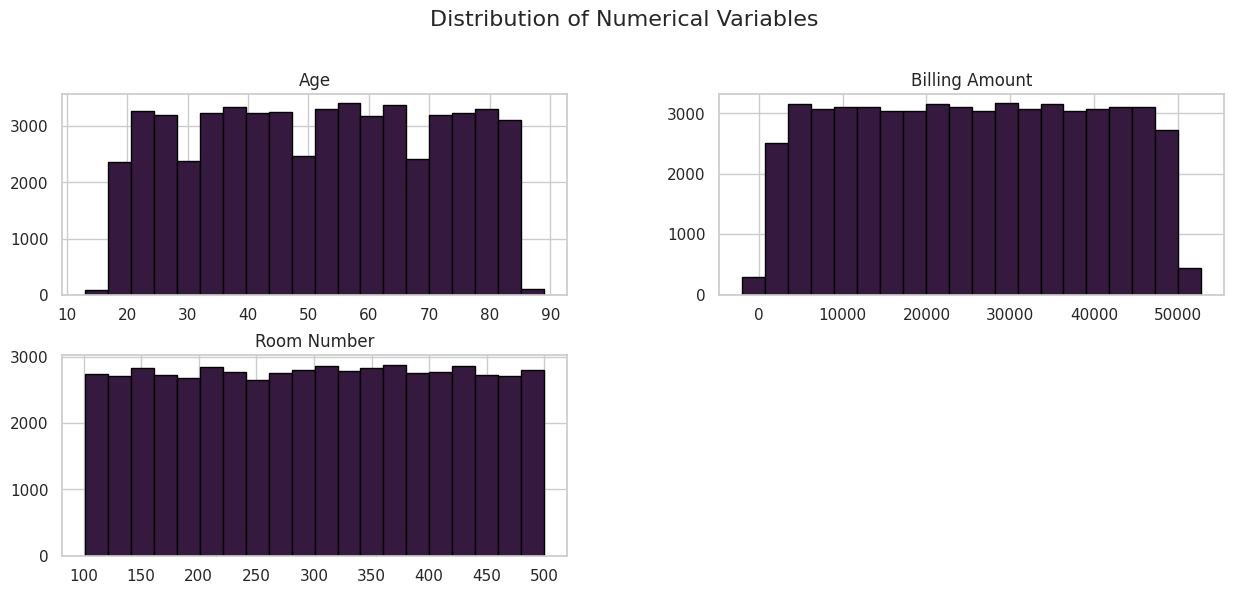

In [ ]:
numerical_cols = ['Age', 'Billing Amount', 'Room Number']
sns.set(style="whitegrid", palette="rocket")

df_numerical = df.select(numerical_cols).to_pandas()
df_numerical.hist(bins=20, figsize=(15, 6), edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', y=1.02, fontsize=16)
plt.show()


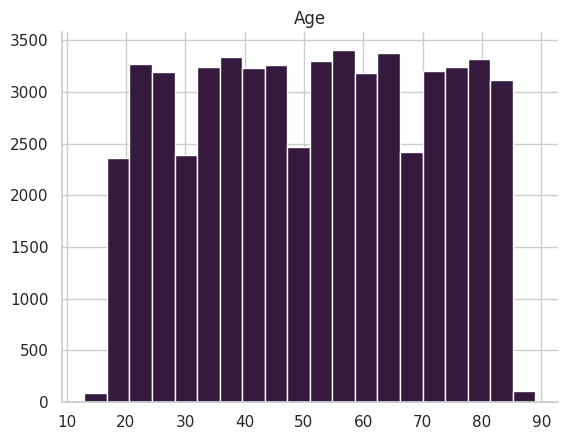

In [ ]:
plt.hist(df['Age'], bins=20)
plt.title('Age')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

#*Categorical Column Distribution*
* The distribution of categorical columns in a dataset describes the frequency or proportion of each category, providing insights into the distribution of categorical variables and their prevalence within the dataset.

In [ ]:
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider',
                     'Admission Type', 'Medication', 'Test Results']

<ipython-input-136-960ba2b18360>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset_df, x=feature, ax=plot_axes, palette=sns.color_palette("rocket"))
<ipython-input-136-960ba2b18360>:16: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=subset_df, x=feature, ax=plot_axes, palette=sns.color_palette("rocket"))
<ipython-input-136-960ba2b18360>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset_df, x=feature, ax=plot_axes, palette=sns.color_palette("rocket"))
<ipython-input-136-960ba2b18360>:16: UserWarning: The palette list has more values (6) than needed (2), which may

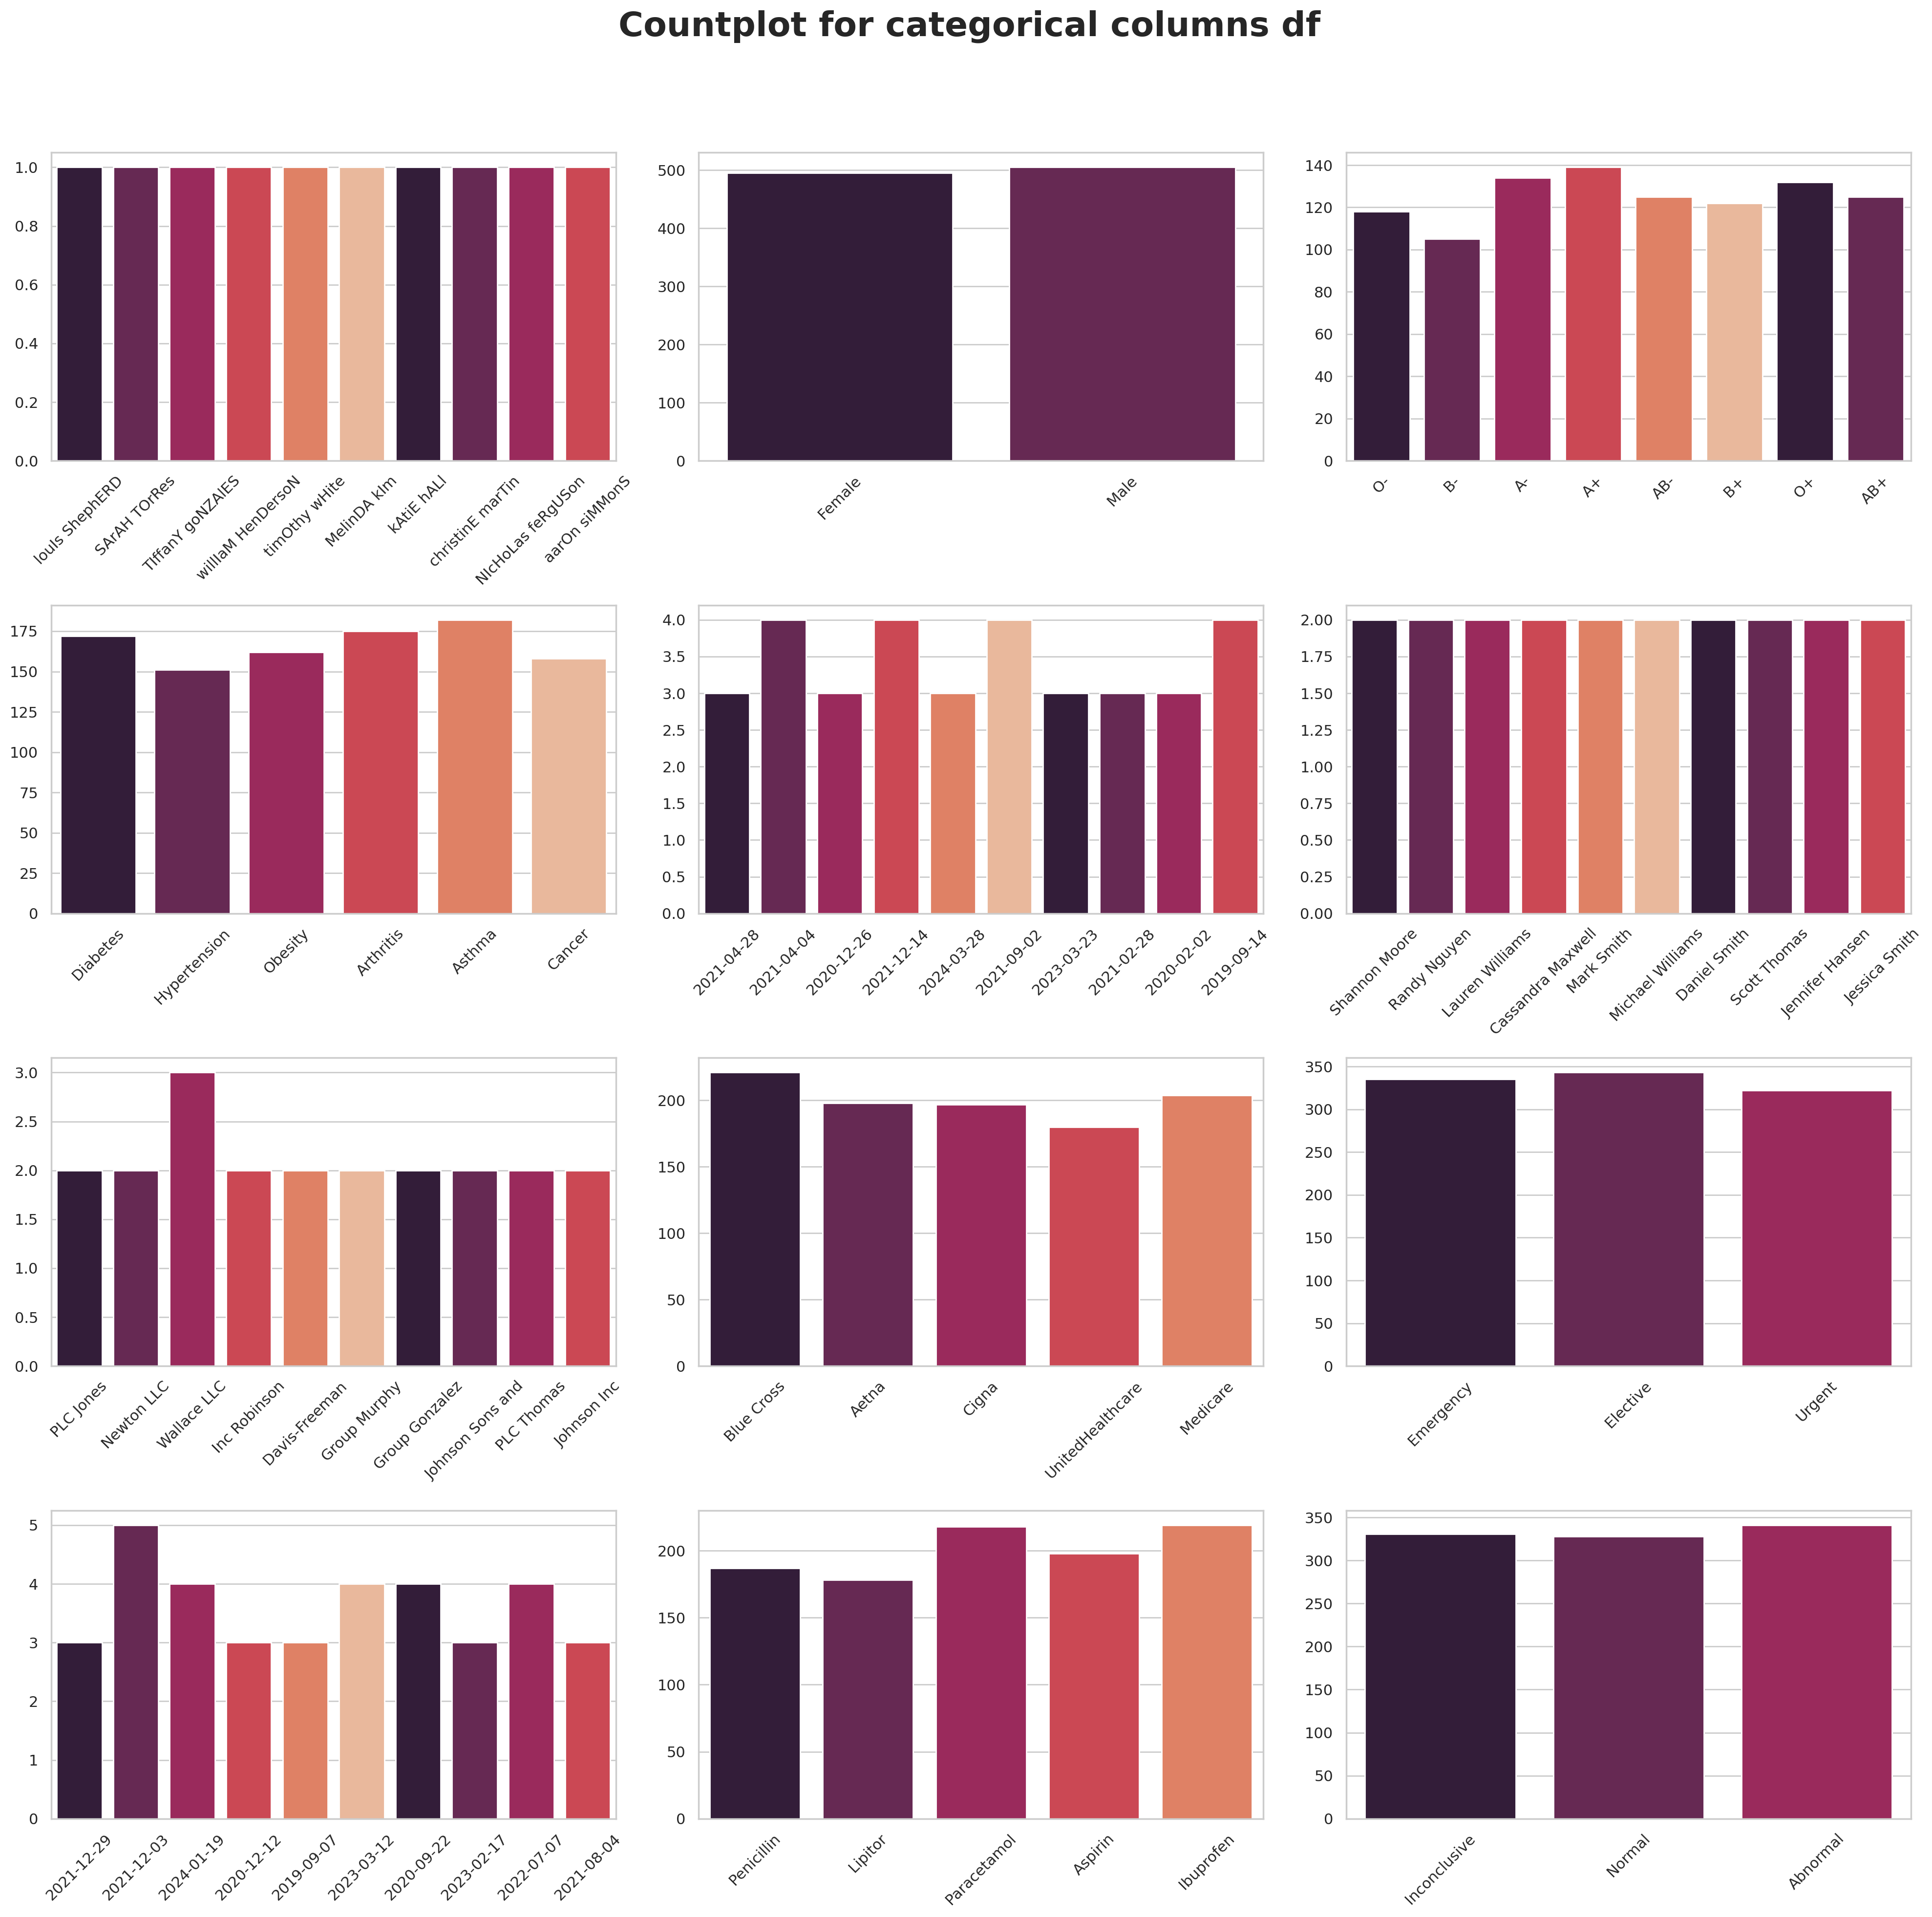

In [ ]:

def countplot_categorical_subplots(df, string, subset_rows=1000, max_categories=10):
    categorical_features = df.select(pl.col(pl.Utf8)).columns
    num_cols = 3
    num_rows = int(np.ceil(len(categorical_features) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows), dpi=200)
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        plot_axes = axes[i]

        subset_df = df.sample(n=subset_rows).to_pandas()
        unique_categories = subset_df[feature].value_counts().index[:max_categories]
        subset_df = subset_df[subset_df[feature].isin(unique_categories)]

        sns.countplot(data=subset_df, x=feature, ax=plot_axes, palette=sns.color_palette("rocket"))
        plot_axes.set_ylabel('')
        plot_axes.set_xlabel('')
        plot_axes.tick_params(axis='x', rotation=45)

    for i in range(len(categorical_features), len(axes)):
        axes[i].axis('off')

    fig.suptitle(f'Countplot for {string} df\n\n\n', ha='center', fontweight='bold', fontsize=25)
    plt.tight_layout()

countplot_categorical_subplots(df, 'categorical columns', subset_rows=1000, max_categories=10)


*Which Medical Condition is more Prominent?*

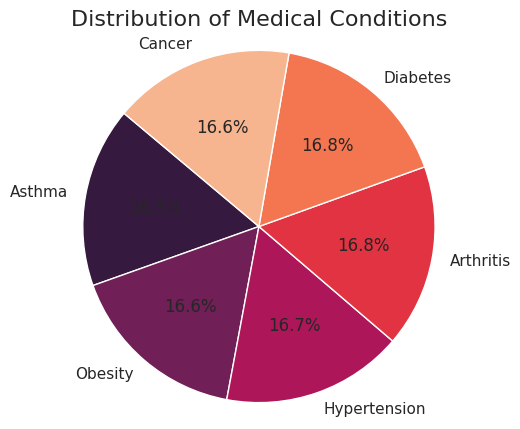

In [ ]:
# Which Medical Condition is more Prominent?
medical_condition_counts = df['Medical Condition'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(medical_condition_counts['count'], labels=medical_condition_counts['Medical Condition'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Medical Conditions', fontsize=16)
plt.axis('equal')
plt.show()


#*Which type of patient are more admitting?*

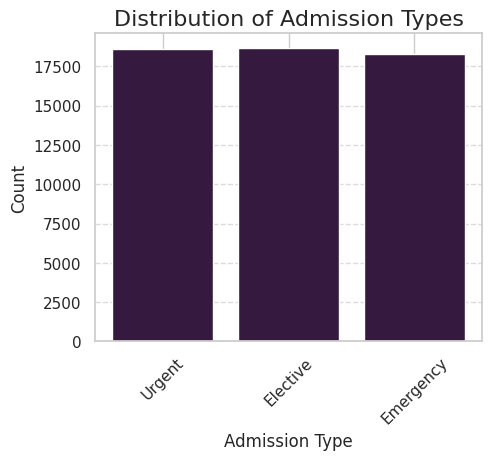

In [ ]:
# Which type of patient are more admitting?
admission_type_counts = df['Admission Type'].value_counts()
plt.figure(figsize=(5,4))
plt.bar(admission_type_counts['Admission Type'], admission_type_counts['count'])
plt.title('Distribution of Admission Types', fontsize=16)
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#*Which Medication is mostly given?*

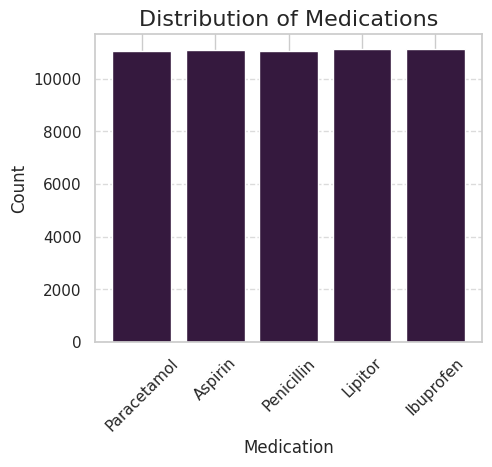

In [ ]:
# Distribution of Medications
medication_counts = df['Medication'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(medication_counts['Medication'], medication_counts['count'])
plt.title('Distribution of Medications', fontsize=16)
plt.xlabel('Medication', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#*Are the Patient mostly male or female?*

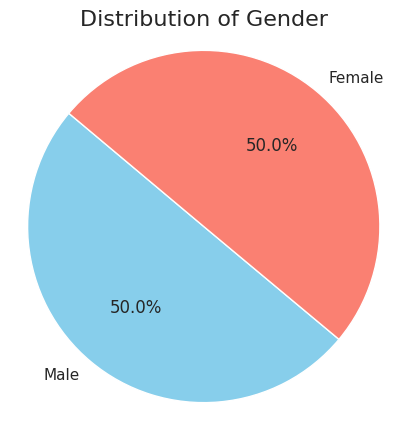

In [ ]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_counts['count'], labels=gender_counts['Gender'], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title('Distribution of Gender', fontsize=16)
plt.axis('equal')
plt.show()


#*Which Test results the patients mostly getting?*

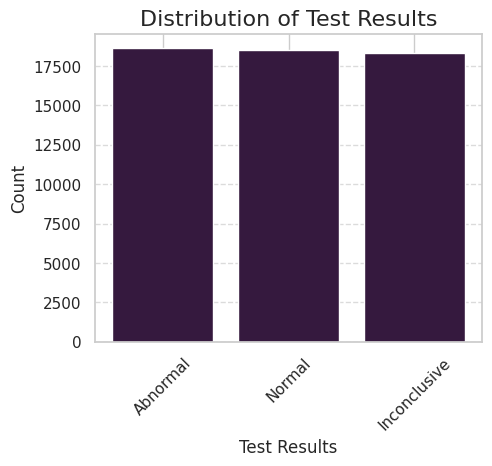

In [ ]:
# Distribution of Test Results
test_results_counts = df['Test Results'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(test_results_counts['Test Results'], test_results_counts['count'])
plt.title('Distribution of Test Results', fontsize=16)
plt.xlabel('Test Results', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


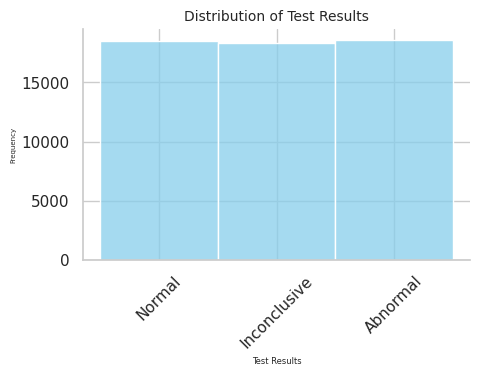

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df, x='Test Results', bins=len(df['Test Results'].unique()), kde=False, color='skyblue')
plt.title('Distribution of Test Results', fontsize=10)
plt.xlabel('Test Results', fontsize=6)
plt.ylabel('Frequency', fontsize=5)
sns.despine()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Summary statistics of 'Billing Amount' column
mean_billing_amount = df['Billing Amount'].mean()
std_dev_billing_amount = df['Billing Amount'].std()

# Calculate skewness and kurtosis using SciPy
skewness_billing_amount = stats.skew(df['Billing Amount'].to_numpy())
kurtosis_billing_amount = stats.kurtosis(df['Billing Amount'].to_numpy())

print("Descriptive Statistics:")
print(f"Mean Billing Amount: {mean_billing_amount}")
print(f"Standard Deviation Billing Amount: {std_dev_billing_amount}")
print(f"Skewness Billing Amount: {skewness_billing_amount}")
print(f"Kurtosis Billing Amount: {kurtosis_billing_amount}")


Descriptive Statistics:
Mean Billing Amount: 25539.3160972118
Standard Deviation Billing Amount: 14211.454430864414
Skewness Billing Amount: -0.0009777690118698975
Kurtosis Billing Amount: -1.1906310970638905
